In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


In [4]:
swat_df = pd.read_csv('SWaT_Dataset_Attack_v0.csv')


In [5]:
swat_df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [19]:
swat_df.columns = swat_df.columns.str.replace(' ', '')


In [20]:
swat_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3   MV101          449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6   AIT201         449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10  MV201          449919 non-null  int64  
 11  P201           449919 non-null  int64  
 12  P202           449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14  P204           449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

In [7]:
print(swat_df.shape)
print(swat_df.size)


(449919, 53)
23845707


In [12]:

swat_df.loc[swat_df['Normal/Attack']=='A ttack', 'Normal/Attack'] = 'Attack'


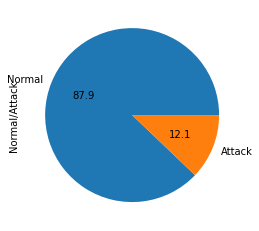

In [13]:
swat_df['Normal/Attack'].value_counts().plot(kind="pie", autopct="%.1f")
plt.show()

In [113]:

features_considered = ['AIT202','DPIT301','MV301','MV303','P301','AIT401','AIT402','FIT401','P401','P404','UV401','AIT501','AIT504','FIT501','FIT502','FIT503','FIT504','P502','PIT501','PIT502']
# features_considered = ['FIT101', 'LIT301',  'AIT202', 'FIT201','PIT502','FIT601']
sub_df = swat_df[:10000]

In [114]:
features = sub_df[features_considered]
features.index = sub_df['Timestamp']
print(features.head())

                           AIT202   DPIT301  MV301  MV303  P301   AIT401  \
Timestamp                                                                  
 28/12/2015 10:00:00 AM  8.396437  19.74838      1      1     1  148.808   
 28/12/2015 10:00:01 AM  8.396437  19.74838      1      1     1  148.808   
 28/12/2015 10:00:02 AM  8.394514  19.69076      1      1     1  148.808   
 28/12/2015 10:00:03 AM  8.394514  19.69076      1      1     1  148.808   
 28/12/2015 10:00:04 AM  8.394514  19.69076      1      1     1  148.808   

                           AIT402    FIT401  P401  P404  UV401    AIT501  \
Timestamp                                                                  
 28/12/2015 10:00:00 AM  156.0882  1.713517     1     1      2  7.878621   
 28/12/2015 10:00:01 AM  156.0882  1.715952     1     1      2  7.878621   
 28/12/2015 10:00:02 AM  156.0882  1.715952     1     1      2  7.878621   
 28/12/2015 10:00:03 AM  156.0882  1.714670     1     1      2  7.878621   
 28/12/2015

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

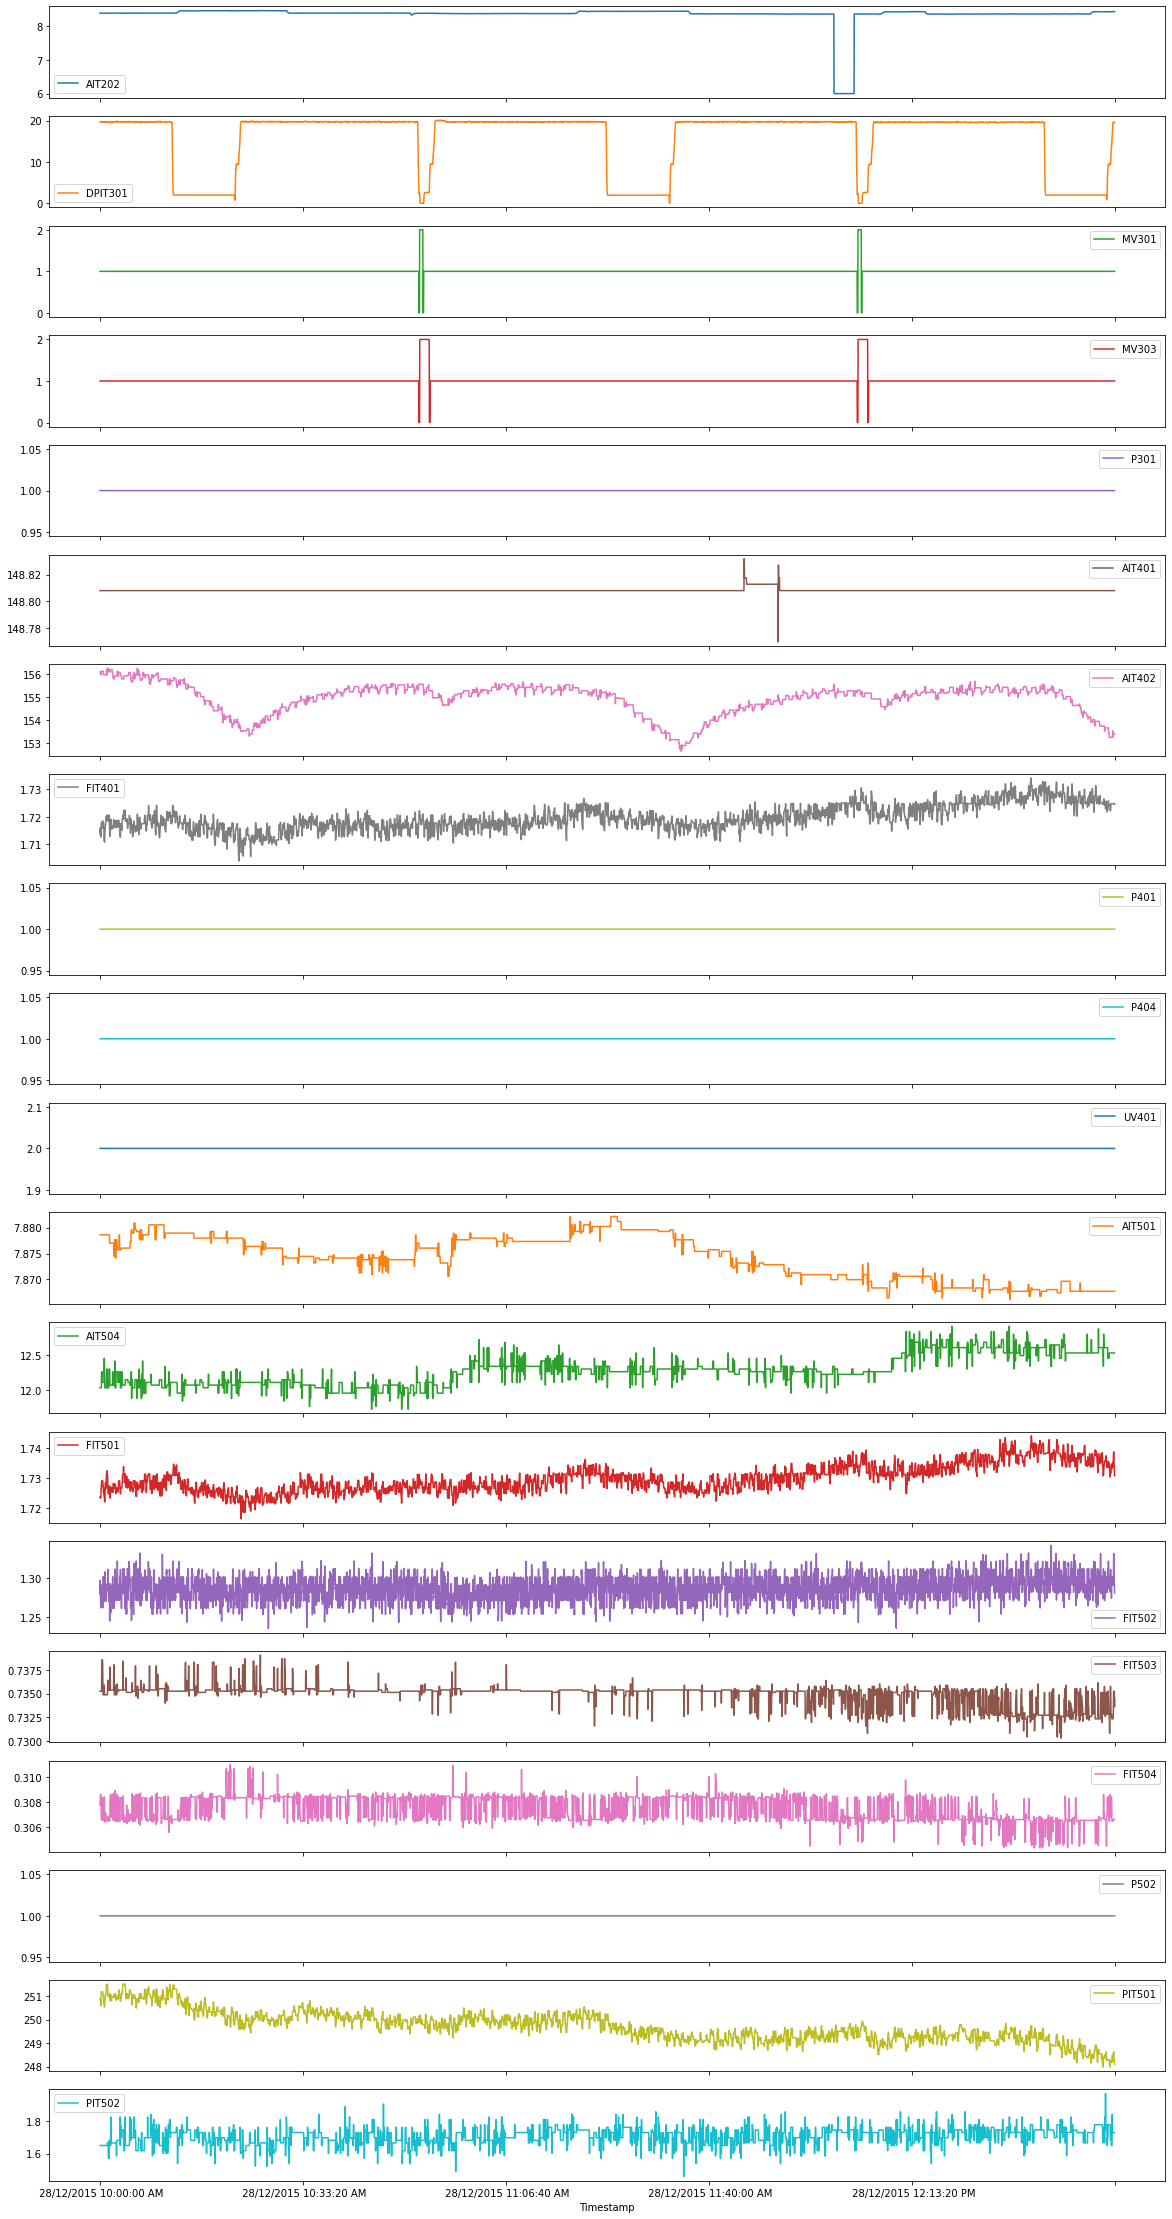

In [118]:
features.plot(subplots=True,figsize=(20, 40))

In [48]:
swat_df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal


In [84]:
dataset = swat_df.values
dataset = numpy.delete(dataset, 0,1)
X = dataset[:, :-1]
y = dataset[:,-1]

In [85]:
X

array([[2.427057, 522.8467, 2, ..., 1, 1, 1],
       [2.446274, 522.886, 2, ..., 1, 1, 1],
       [2.489191, 522.8467, 2, ..., 1, 1, 1],
       ...,
       [2.531467, 520.6878, 2, ..., 1, 1, 1],
       [2.521218, 520.7271, 2, ..., 1, 1, 1],
       [2.501681, 521.1196, 2, ..., 1, 1, 1]], dtype=object)

In [86]:
y

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [111]:

selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = swat_df.iloc[:,cols]




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [11 23 29 32 43 48 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [112]:
features_df_new

,AIT202,DPIT301,MV301,MV303,P301,AIT401,AIT402,FIT401,P401,P404,UV401,AIT501,AIT504,FIT501,FIT502,FIT503,FIT504,P502,PIT501,PIT502
0,8.396437,19.74838,1,1,1,148.8080,156.0882,1.713517,1,1,2,7.878621,12.03538,1.723789,1.279621,0.735269,0.307786,1,250.8652,1.649953
1,8.396437,19.74838,1,1,1,148.8080,156.0882,1.715952,1,1,2,7.878621,12.03538,1.723789,1.297554,0.735269,0.307786,1,250.8652,1.649953
2,8.394514,19.69076,1,1,1,148.8080,156.0882,1.715952,1,1,2,7.878621,12.03538,1.723404,1.293967,0.735269,0.308619,1,250.8812,1.649953
3,8.394514,19.69076,1,1,1,148.8080,156.0882,1.714670,1,1,2,7.878621,12.03538,1.723404,1.281158,0.735269,0.308619,1,250.8812,1.649953
4,8.394514,19.69076,1,1,1,148.8080,156.0882,1.714670,1,1,2,7.878621,12.03538,1.723404,1.281158,0.735269,0.308619,1,250.8812,1.649953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,8.638683,20.39823,1,1,1,148.8032,145.6037,1.705315,1,1,2,7.745642,14.80390,1.716483,1.288971,0.734885,0.306569,1,251.1535,0.865024
449915,8.638683,20.39823,1,1,1,148.8032,145.6037,1.705315,1,1,2,7.745642,14.80390,1.714560,1.272704,0.734885,0.306569,1,251.0734,0.865024
449916,8.638683,20.33101,1,1,1,148.8032,145.5524,1.706212,1,1,2,7.745642,14.80390,1.714560,1.269502,0.734885,0.306569,1,251.0734,0.865024
449917,8.638683,20.29579,1,1,1,148.8032,145.5524,1.706212,1,1,2,7.745642,14.80390,1.714560,1.263866,0.734885,0.307978,1,251.0734,0.865024
